In [2]:
import pandas as pd
import numpy as np

C:\Users\My\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\Users\My\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [3]:
RCDF=pd.read_csv(r"C:\Users\My\Desktop\Projects\Hierarchical Clustering\Data.csv")
RCDF.head()

,Cust_ID,Name,Avg_Mthly_Spend,No_Of_Visits,Apparel_Items,FnV_Items,Staples_Items
0,1,A,10000,2,1,1,0
1,2,B,7000,3,0,10,9
2,3,C,7000,7,1,3,4
3,4,D,6500,5,1,1,4
4,5,E,6000,6,0,12,3


In [4]:
#distance computations
from scipy.spatial.distance import pdist,squareform
from scipy.stats import zscorere

In [5]:
data_f=RCDF.iloc[:,2:]

In [6]:
data_f_z = data_f.apply(zscore)
data_f_z

,Avg_Mthly_Spend,No_Of_Visits,Apparel_Items,FnV_Items,Staples_Items
0,1.886498,-1.240347,1.527525,-0.741433,-1.380131
1,0.787567,-0.620174,-0.654654,1.280656,1.725164
2,0.787567,1.860521,1.527525,-0.292080,0.000000
3,0.604412,0.620174,1.527525,-0.741433,0.000000
4,0.421257,1.240347,-0.654654,1.730009,-0.345033
5,-0.311364,-0.620174,-0.654654,-0.741433,1.380131
6,-0.860829,0.620174,-0.654654,1.505333,-0.690066
7,-0.860829,-0.620174,-0.654654,-0.741433,-1.035098
8,-1.043984,-1.240347,-0.654654,-0.516756,-0.690066
9,-1.410294,0.000000,-0.654654,-0.741433,1.035098


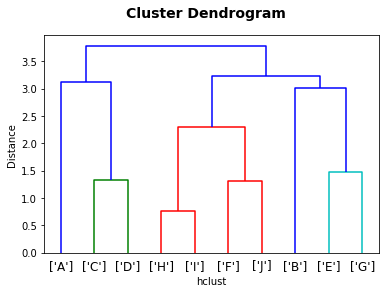

In [8]:
#with Scaling

from scipy.spatial.distance import pdist, squareform
d_euc= pdist(data_f_z, metric = "euclidean")
from scipy.cluster.hierarchy import linkage, dendrogram, cut_tree
clus1=linkage(d_euc, method = "average")

import matplotlib.pyplot as plt
dendrogram(clus1, labels=RCDF[["Name"]].values.tolist())
plt.xlabel('hclust')
plt.ylabel('Distance')
plt.suptitle('Cluster Dendrogram', fontweight ='bold',fontsize=14);
plt.show()

In [9]:
#bulilding the clusters
d_euc=pdist(RCDF.ix[:,2:],metric="euclidean")
clus1=linkage(d_euc,method ="average")

C:\Users\My\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


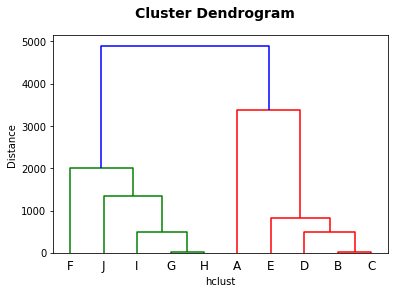

In [10]:
dendrogram(clus1, labels=RCDF.iloc[:,1].values.tolist())#  RCDF[["Name"]]
plt.xlabel('hclust')
plt.ylabel('Distance')
plt.suptitle('Cluster Dendrogram', fontweight ='bold',fontsize=14);